# Adult Data Set Analisys

## Abstract
The dataset presented in the folowing paper describes **40000** samples made out of **14 individual features** regarding a part of the working population aged over 16 years old.

# What are we going to use ?

In [13]:
from pmlb import fetch_data, classification_dataset_names
from Regressions.SGDClassifier_Solver import sgdcalssifier
from Regressions.SupportVectorMachine_Solver import supportVectorMachine
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

%load 

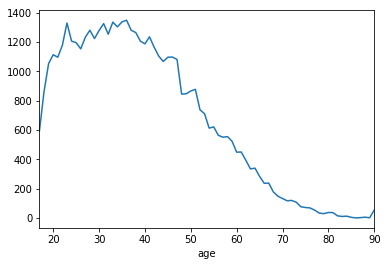

In [2]:
adult_data, adult_labels = fetch_data('adult', return_X_y=True, local_cache_dir='./')
adult_data_frame = fetch_data('adult')
adult_data_frame.groupby("age")["target"].count().plot(kind='line')
plt.show()

In [3]:
print(adult_data_frame.head())
adult_data_frame.describe()

    age  workclass    fnlwgt  education  education-num  marital-status  \
0  39.0          7   77516.0          9           13.0               4   
1  50.0          6   83311.0          9           13.0               2   
2  38.0          4  215646.0         11            9.0               0   
3  53.0          4  234721.0          1            7.0               2   
4  28.0          4  338409.0          9           13.0               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           1             1     4    1        2174.0           0.0   
1           4             0     4    1           0.0           0.0   
2           6             1     4    1           0.0           0.0   
3           6             0     2    1           0.0           0.0   
4          10             5     2    0           0.0           0.0   

   hours-per-week  native-country  target  
0            40.0              39       1  
1            13.0              39       1  
2 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,3.870439,1.896641e+05,10.288420,10.078089,2.618750,6.577700,1.443287,3.668052,0.668482,1079.067626,87.502314,40.422382,36.749355,0.760718
std,13.710510,1.464234,1.056040e+05,3.874492,2.570973,1.507703,4.230509,1.602151,0.845986,0.470764,7452.019058,403.004552,12.391444,7.775343,0.426649
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.175505e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,1.000000
50%,37.000000,4.000000,1.781445e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,1.000000
75%,48.000000,4.000000,2.376420e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,1.000000
max,90.000000,8.000000,1.490400e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [4]:
def plot_correlation(adult_data_frame, size=15):
    corr= adult_data_frame.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()

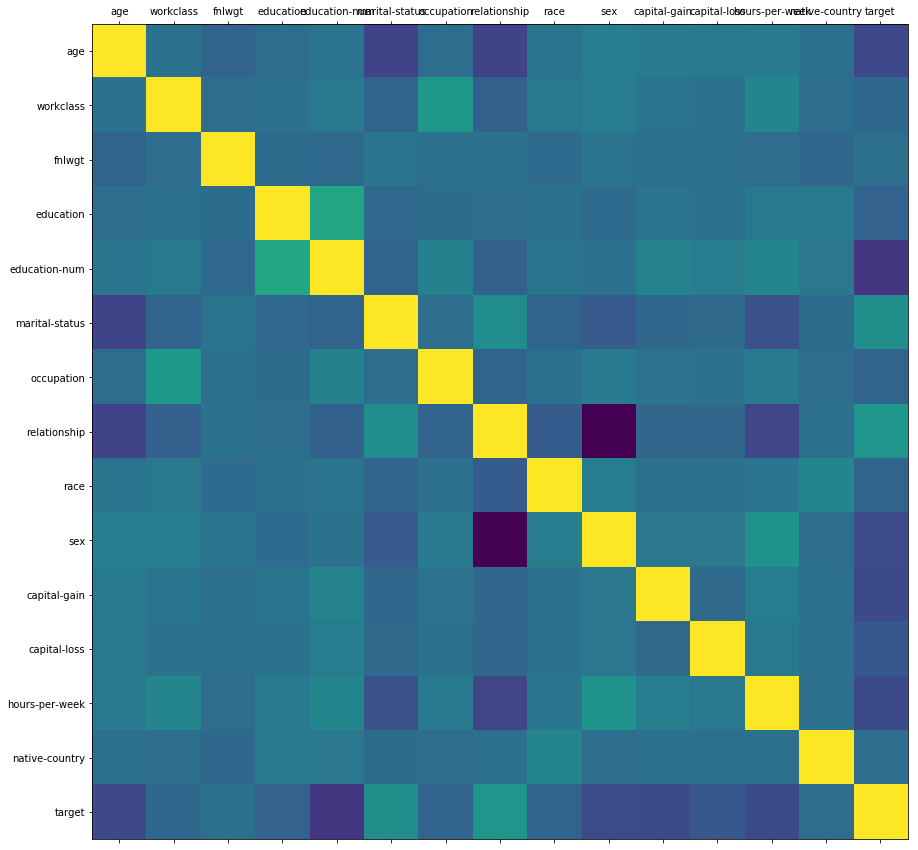

In [5]:
plot_correlation(adult_data_frame)

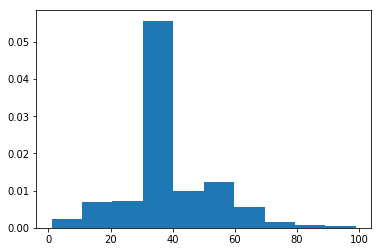

In [6]:
x= adult_data_frame['hours-per-week']
plt.hist(x,bins=None,density=True,normed=None,histtype='bar')
plt.show()

In the following table we are able to see the influence that the relationship status has on the targeted outcome. On the original dataset, the outliers, 0 and 9 are 'Husbands' and 'Wifes', therefore, couples, while the rest of the labels are 'Divorced' ,'Married-spouse-absent' ,'Never-married' ,'Separated', 'Widowed'.

In [7]:
adult_data_frame[['relationship','target']].groupby(['relationship']).mean()

,target
relationship,
0,0.551329
1,0.898593
2,0.965471
3,0.985358
4,0.939707
5,0.531103


Given the obvious difference between the Singles and Couples, we are going to alter the column so that we will only have the 'Single' and 'Couple' labels.

In [8]:
adult_data_frame[['marital-status','target']].groupby(['marital-status']).mean()
adult_data_frame['marital-status'] = adult_data_frame['marital-status'].replace([0,3,4,5,6],'Single')
adult_data_frame['marital-status'] = adult_data_frame['marital-status'].replace([1,2],'Couple')
adult_data_frame[['marital-status','target']].groupby(['marital-status']).mean()

,target
marital-status,
Couple,0.553979
Single,0.936086


In [11]:
adult_data_frame[['marital-status','relationship','target']].groupby(['relationship','marital-status']).mean()

target
relationship marital-status          
0            Couple          0.551329
1            Couple          0.782609
             Single          0.898806
2            Couple          0.856436
             Single          0.982362
3            Couple          0.826389
             Single          0.988436
4            Single          0.939707
5            Couple          0.531103

In [15]:
X= adult_data_frame.drop(['target'],axis=1)
y=adult_data_frame['target']

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_val.shape, y_val.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (27351, 14)(27351,)
Validation dataset: (6838, 14)(6838,)
Test dataset: (14653, 14)(14653,)


In [19]:
adult_data_frame[['workclass','target']].groupby(['workclass']).sum()

,target
workclass,
0,2534
1,871
2,2209
3,10
4,26519
5,757
6,2785
7,1451
8,19


In [26]:
data = adult_data_frame
col_names = data.columns
num_data = data.shape[0]
for c in col_names:
    num_non = data[c].isin(["?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")
        
data = data[data["workclass"] != "?"]
data = data[data["occupation"] != "?"]
data = data[data["native-country"] != "?"]

print(data.shape)

(48842, 15)
